In this notebook we will learn how we could use a neural network to predict cancer based on medical images. 

### Start by importing packages


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

### Load the data

Again we will use a dataset built-in to Sklearn that includes data related to diagnosing breast cancer.

In [7]:
cancer = load_breast_cancer()

# print('Dataset raw object', cancer)
print('Dataset description', cancer['DESCR'])

Dataset description .. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is W

## Split into our training and testing XY sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

print(X_train.shape)

(426, 30)


## Exercise 1: Scale the data

The Multilayer Perceptron (MLP) approach is one of the few that doesn't automatically scale the data, so let's do that. Here we will use Numpy to do it manually, though there are alternative built-in methods within scikit-learn.

In the code block below, use `X_train.mean(axis=0)` and similar functions to scale ALL of the X variables so that they have mean 0 and standard deviation 1. HINT: X_train and others are numpy arrays and so you can use fast raster math, e.g., `X_train - mean_on_train`.

In [11]:
# Exercies 1 Code
# np.mean()
mean_on_train = X_train.mean(axis=0)
print(mean_on_train)

[1.41591714e+01 1.92330047e+01 9.21438967e+01 6.58415023e+02
 9.63659859e-02 1.03669601e-01 8.86501308e-02 4.91440610e-02
 1.80473239e-01 6.26169953e-02 4.04795070e-01 1.21222723e+00
 2.84097934e+00 4.06956737e+01 6.98667371e-03 2.50779930e-02
 3.16993207e-02 1.17015352e-02 2.04367559e-02 3.71274953e-03
 1.63168169e+01 2.56379812e+01 1.07459131e+02 8.87647887e+02
 1.32503404e-01 2.52836338e-01 2.69481120e-01 1.15279345e-01
 2.89649296e-01 8.35402582e-02]


In [12]:
# the .std() function is similarily powerful/fast.
std_on_train = X_train.std(axis=0)
print(std_on_train)

[3.54820940e+00 4.11777749e+00 2.44085763e+01 3.60001771e+02
 1.38386118e-02 5.06235856e-02 7.84252380e-02 3.87729435e-02
 2.76599707e-02 6.84425158e-03 2.86830175e-01 5.45592960e-01
 2.05927160e+00 4.84585335e+01 2.82332840e-03 1.69519540e-02
 3.14116890e-02 5.90579400e-03 8.19292513e-03 2.62721557e-03
 4.88905984e+00 6.05754894e+00 3.39251771e+01 5.85664376e+02
 2.29034367e-02 1.51720808e-01 1.98125175e-01 6.55415896e-02
 6.32173051e-02 1.77743394e-02]


In [14]:

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train


# Using numpy functions, compute the mean value per feature on the training set and the STD.

## Create the MLP model object and fit it

Using this new scaled training data, we are ready to define a Neural Net, Known here as a Multi-Layer-Perceptron (MLP) classifier. Because this next line hides away millions of other lines of code, you may want to explore it. In VS Code, you can navigate to a function's definition by placing your cursor in the function and press f-12. Try it in the cell below on the `MLPClassifier` code! The best documentation is often the code itself.

Coefficients:  [array([[-8.46364920e-02,  7.56426094e-02, -2.87781733e-02,
         2.66265945e-01, -2.72947614e-01],
       [-2.07849353e-01, -2.99110320e-01,  8.40124557e-02,
         7.52968917e-01, -3.05889252e-01],
       [ 1.14292654e-01, -7.48894340e-02, -5.37797015e-02,
         5.81310427e-01, -5.52562970e-01],
       [-4.90400890e-01, -5.20501805e-01,  1.62324363e-01,
         4.55857860e-01,  8.65760800e-02],
       [ 4.35697232e-01,  1.66512181e-01, -4.14252942e-02,
         3.75772672e-01, -5.16604603e-01],
       [ 1.04764722e-01, -2.93402188e-01,  3.30781897e-01,
         8.07117747e-02, -6.64732502e-02],
       [-3.73603968e-01,  1.21531359e-01, -1.36231864e-01,
         3.24710405e-01, -4.75858976e-01],
       [-9.15999347e-02, -4.61813766e-02, -8.34822239e-04,
         6.32380884e-01, -2.44251791e-02],
       [-1.75691242e-01, -1.32187370e-01,  1.61048663e-01,
        -1.62636794e-01, -1.54971767e-02],
       [ 2.39743947e-01, -2.18266379e-01, -2.03320398e-01,
       

c:\Users\jajohns\miniforge3\envs\env8222a\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


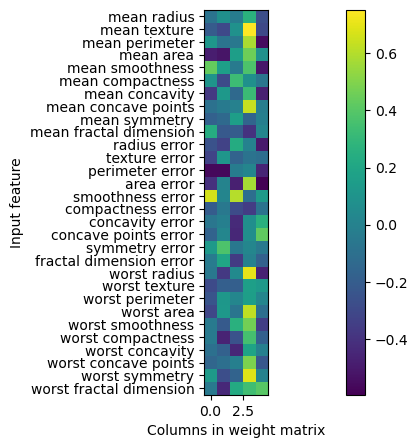

In [19]:
# KEY Excercise 5.1.2 workspace
mlp = MLPClassifier(random_state=0, hidden_layer_sizes=(5,5))

# Create an MLPClassifier object but with only 1 layer

# Now fit it with the scaled X and y TRAINING data.
mlp.fit(X_train_scaled, y_train)

print('Coefficients: ', mlp.coefs_)

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

## Assess the fit

Now we assess MLP's accuracy on the TRAINING and the TESTING data.

Notice here also I'm introducing another convenient way of combining strings and numbers. The {:.2f} specifies a placeholder for a 2-digit representation of a floating point number. The Format method then places that floating point value into that placeholder.

In [17]:
score_train = mlp.score(X_train_scaled, y_train)
score_test = mlp.score(X_test_scaled, y_test)

print("Accuracy on training set: {:.3f}".format(score_train))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.951


## Plot the inputs and hidden layers of the neural net

It can be hard perhaps to visualize what exaclty the neural net looks like (there is no coefficients table to simply look at). But here, it is small enough to actually visualize the coefficients within the network.

Below, we plot the coeffs_ array to see it.

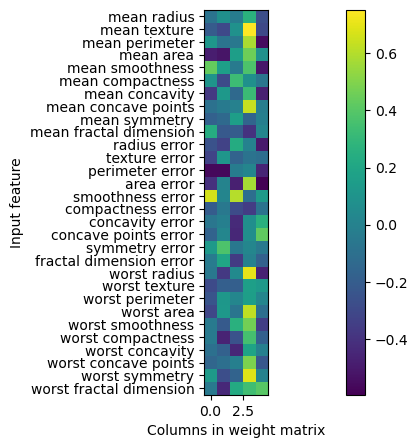

In [18]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

## Exercies 5.1.2: Understanding which features matter most

One of the massive challenges in Neural Nets is understanding why exactly it makes the predictions it does. Can you identify which input feature shows the largest positive effect on on cancer diagnosis?

You probably can't make heads or tails of it. Let's create a greatly simplified version of our neural network to try to see if we can understand it.

Specifically create a new `MLPClassifier` but this time make it have only a single hidden layer. Hint: use f-12 on the MLPClassifier code to see it's documentation and figure out what new input variable you sohuld specify when calling `mlp = MLPClassifier( .......  )`. Plot the output coefficients just like above. With only a single layer, the variables become somewhat more interpretable. 

Which variable now seems to have the largest positive impact?

In [ ]:
# Excercise 5.1.2 workspace

### Other approaches to understanding neural nets

- Let's apply our new MLPClassifier model type to our hand-written digits dataset.
  - Here, though, I want to highight a few other tools used in the ML workflow.
    - make_pipeline
    - StandardScaler

In [ ]:
import warnings

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import os
import shutil
from sklearn.datasets._base import get_data_home

data_home = get_data_home()
openml_dir = os.path.join(data_home, "openml")
print(openml_dir)

C:\Users\jajohns\scikit_learn_data\openml


### Use a fetch_openml helper function to get the MNIST dataset

In [ ]:
# Load data from https://www.openml.org/d/554

X, y = fetch_openml(
    "mnist_784",
    version=1,
    return_X_y=True,
    as_frame=False
)

### Scale the X variables

In [ ]:
X = X / 255.0

### Split data into train partition and test partition

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

In [ ]:
print('Look at the data')
print(X_train.shape, y_train.shape)
print(X_train, y_train)

Look at the data
(21000, 784) (21000,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] ['8' '0' '6' ... '7' '1' '1']


In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=8,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Iteration 3, loss = 0.13983521
Iteration 4, loss = 0.11378556
Iteration 5, loss = 0.09443967
Iteration 6, loss = 0.07846529
Iteration 7, loss = 0.06506307
Iteration 8, loss = 0.05534985
Training set score: 0.986429
Test set score: 0.953061


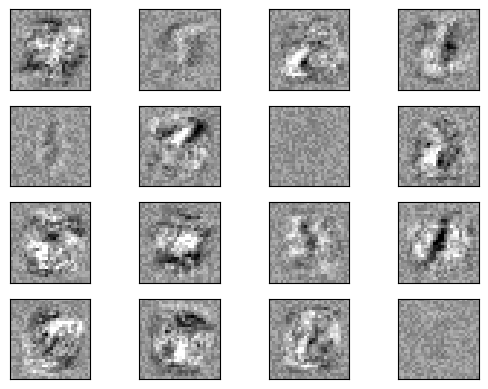

In [ ]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Surely there is a better way to test lots of hyperparameters?

There is. Pipelines!

For this we're going to play with a new, self generated set of data.



In [ ]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]


## Here's what they look like

Our goal will be to iteratively try out a bunch of different classifiers to see which works best.

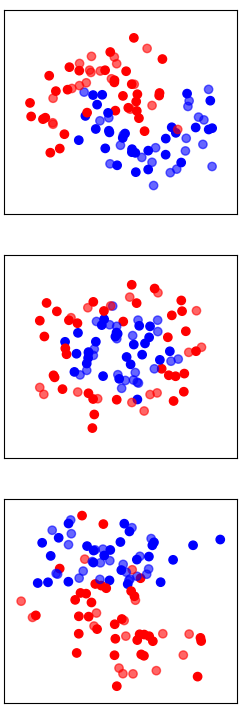

To do that, we will create a loop with multiple options, put into a "pipeline" object.

In [ ]:
h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

print('Names:', names)

Names: ['alpha 0.10', 'alpha 0.32', 'alpha 1.00', 'alpha 3.16', 'alpha 10.00']


## Run the whole pipeline on our created data

We'll iterate over the datasets and the classifiers in the pipeline we made.

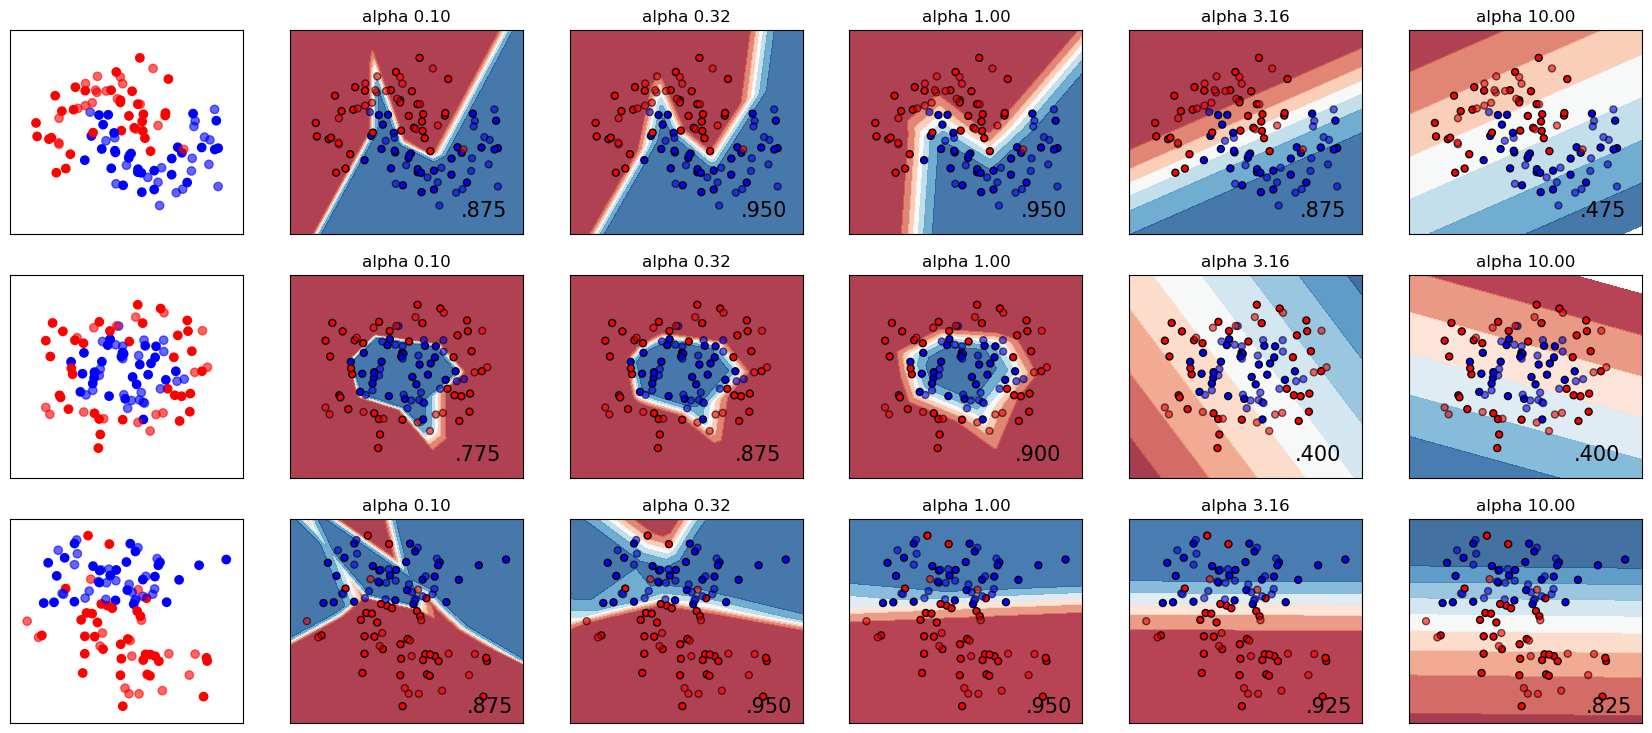

In [ ]:

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

# Success!

You have successfully created a pipeline that can test multiple classifiers and hyperparameters on multiple datasets and that can robustly scale to big* data. 

Here, the * is because our datasets can be huge, but are still calculated on the CPU.

Next we're going to venture forth into the world of GPU computing with PyTorch!